In [1]:
#Importing Dependencies
import os             # use it to manipulate file/folder directories
import shutil         # to copy or move any data from one dir to another
import numpy as np    # to convert image data to array format
import pandas as pd   # use it to make dataframes
from PIL import Image # use it to access image file in a directory and check its type

In [2]:
# Set up retrieval of file info, img label, src and dest dir's
src_img_dir = "./jpeg"
dest_parent_dir = "./calc_train"
csv_file_path = "./csv/calc_case_description_train_set.csv"
df = pd.read_csv(csv_file_path)
df['folder_path'] = df['image file path'].str.split('/').str[2]
# Drop unnecessary columns
df = df.drop(['image file path', 'cropped image file path', 'ROI mask file path'], axis=1)
df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,folder_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...


In [3]:
# Access 'pathology' and 'folder_path' columns
selected_data_df = df[['pathology', 'folder_path']]
selected_data_df.head()

,pathology,folder_path
0,MALIGNANT,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...
1,MALIGNANT,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...
2,BENIGN,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...
3,BENIGN,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...
4,BENIGN_WITHOUT_CALLBACK,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...


In [4]:
# Iterate over the rows and access values:
def is_valid_image(file_path):
    """Return True if the file is a valid image."""
    try:
        with Image.open(file_path) as img:
            img.verify()  # verify that it is, in fact, an image
        return True
    except (IOError, SyntaxError):
        return False

    
def image_type(image_path):
    with Image.open(image_path) as img:
        # Convert image to numpy array
        data = np.array(img)
        # Check if RGB image
        if len(data.shape) == 3:
            # Check if all channels have same values which indicates grayscale
            if np.array_equal(data[:,:,0], data[:,:,1]) and np.array_equal(data[:,:,1], data[:,:,2]):
                unique_values = np.unique(data[:,:,0])
                # Check if only two unique values (0 and 255) which indicates binary
                if len(unique_values) == 2 and 0 in unique_values and 255 in unique_values:
                    return "Binary"
                else:
                    return "Grayscale"
            else:
                return "Color"

        # Check if single channel image
        elif len(data.shape) == 2:
            unique_values = np.unique(data)
            # Check if only two unique values (0 and 255) which indicates binary
            if len(unique_values) == 2 and 0 in unique_values and 255 in unique_values:
                return "Binary"
            else:
                return "Grayscale"

# Iteration routine to copy and transfer images from source to the labeled directories
dest_folder = "" # destination folder
for index, row in selected_data_df.iterrows():
    pathology = row['pathology']
    folder_path = row['folder_path']
    print(folder_path)    
    dest_folder = dest_parent_dir + "/" + pathology    
    # Iterate through each individual file in a folder
    target_dir = src_img_dir + "/" + folder_path
    contents = os.listdir(target_dir)
    for item in contents:
        full_path_toFile = os.path.join(target_dir, item)
        if is_valid_image(full_path_toFile):
            img_type = image_type(full_path_toFile)
            if img_type:
                dest_file = os.path.join(dest_folder, item)
                shutil.copy2(full_path_toFile, dest_file)                
                print(f"Image File ({img_type}): {item}")
            else:
                print(f"Not an Image File: {item}")
        else:
            print(f"Not an Image File: {item}")

1.3.6.1.4.1.9590.100.1.2.47414316010368386519740343172775938548


FileNotFoundError: [Errno 2] No such file or directory: './calc_train/MALIGNANT\\1-188.jpg'

In [5]:
print(img_dir + "/") #+ folder_path

NameError: name 'img_dir' is not defined

In [6]:
df.dtypes

patient_id              object
breast density           int64
left or right breast    object
image view              object
abnormality id           int64
abnormality type        object
calc type               object
calc distribution       object
assessment               int64
pathology               object
subtlety                 int64
folder_path             object
dtype: object

In [26]:
df['image view'].groupby(df['pathology']).value_counts()

pathology                image view
BENIGN                   MLO           277
                         CC            251
BENIGN_WITHOUT_CALLBACK  MLO           244
                         CC            230
MALIGNANT                MLO           286
                         CC            258
Name: image view, dtype: int64

In [7]:
df['calc distribution'].groupby(df['pathology']).value_counts()

pathology                calc distribution  
BENIGN                   CLUSTERED              406
                         SEGMENTAL               62
                         LINEAR                  20
                         REGIONAL                15
                         DIFFUSELY_SCATTERED      8
                         CLUSTERED-LINEAR         6
                         CLUSTERED-SEGMENTAL      5
                         REGIONAL-REGIONAL        1
BENIGN_WITHOUT_CALLBACK  REGIONAL                42
                         DIFFUSELY_SCATTERED     26
                         CLUSTERED               17
                         LINEAR                   9
                         SEGMENTAL                9
MALIGNANT                CLUSTERED              317
                         SEGMENTAL               97
                         LINEAR                  61
                         REGIONAL                42
                         CLUSTERED-LINEAR        19
                   

In [8]:
benign = df[(df["pathology"] == "BENIGN")]
benign_df = pd.DataFrame(benign)
benign_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,folder_path
2,P_00007,4,LEFT,CC,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,1.3.6.1.4.1.9590.100.1.2.228699627313487111012...
3,P_00007,4,LEFT,MLO,1,calcification,PLEOMORPHIC,LINEAR,4,BENIGN,4,1.3.6.1.4.1.9590.100.1.2.104743410411133110629...
22,P_00011,3,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,1,1.3.6.1.4.1.9590.100.1.2.389208391412680785736...
23,P_00011,3,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,BENIGN,1,1.3.6.1.4.1.9590.100.1.2.121177287111311333525...
26,P_00013,4,RIGHT,MLO,1,calcification,PLEOMORPHIC,SEGMENTAL,4,BENIGN,4,1.3.6.1.4.1.9590.100.1.2.255137593013925166616...


In [10]:
benign_distribution = benign_df['calc distribution'].value_counts()
benign_distribution

CLUSTERED              406
SEGMENTAL               62
LINEAR                  20
REGIONAL                15
DIFFUSELY_SCATTERED      8
CLUSTERED-LINEAR         6
CLUSTERED-SEGMENTAL      5
REGIONAL-REGIONAL        1
Name: calc distribution, dtype: int64

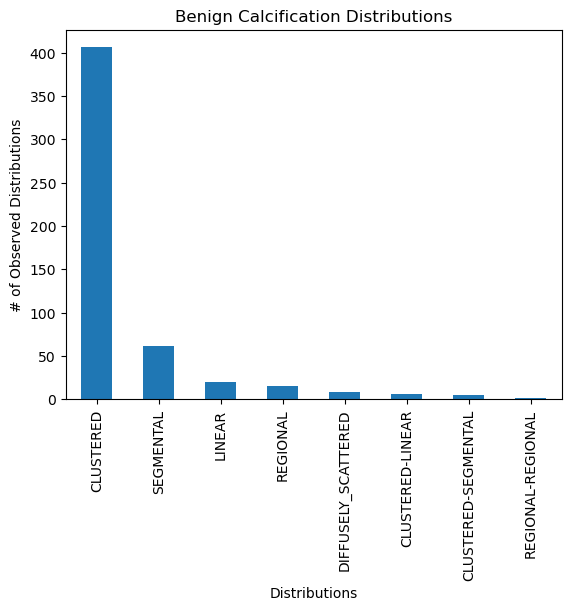

In [44]:
import matplotlib.pyplot as plt
benign_bar = benign_distribution.plot(kind = "bar",
title = "Benign Calcification Distributions",
xlabel = "Distributions",
ylabel = "# of Observed Distributions")
plt.show()

In [12]:
benignCB = df[(df["pathology"] == "BENIGN_WITHOUT_CALLBACK")]
benignCB_df = pd.DataFrame(benignCB)
benignCB_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,folder_path
4,P_00008,1,LEFT,CC,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...
5,P_00008,1,LEFT,CC,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...
6,P_00008,1,LEFT,CC,3,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.406725628213826290127...
7,P_00008,1,LEFT,MLO,1,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.147846893112398086048...
8,P_00008,1,LEFT,MLO,2,calcification,NaN,REGIONAL,2,BENIGN_WITHOUT_CALLBACK,3,1.3.6.1.4.1.9590.100.1.2.147846893112398086048...


In [14]:
benigncb_distribution = benignCB_df['calc distribution'].value_counts()
benigncb_distribution

REGIONAL               42
DIFFUSELY_SCATTERED    26
CLUSTERED              17
SEGMENTAL               9
LINEAR                  9
Name: calc distribution, dtype: int64

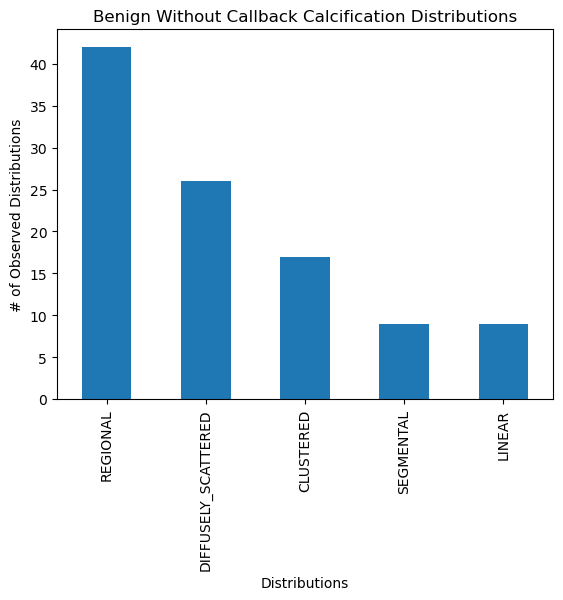

In [46]:
benignCB_bar = benigncb_distribution.plot(kind = "bar",
title = "Benign Without Callback Calcification Distributions",
xlabel = "Distributions",
ylabel = "# of Observed Distributions")
plt.show()

In [15]:
malignant = df[(df["pathology"] == "MALIGNANT")]
malignant_df = pd.DataFrame(malignant)
malignant_df.head()

,patient_id,breast density,left or right breast,image view,abnormality id,abnormality type,calc type,calc distribution,assessment,pathology,subtlety,folder_path
0,P_00005,3,RIGHT,CC,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.3.6.1.4.1.9590.100.1.2.474143160103683865197...
1,P_00005,3,RIGHT,MLO,1,calcification,AMORPHOUS,CLUSTERED,3,MALIGNANT,3,1.3.6.1.4.1.9590.100.1.2.250596608311207922527...
24,P_00012,2,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,4,1.3.6.1.4.1.9590.100.1.2.979807322125930106161...
25,P_00012,2,LEFT,MLO,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,3,1.3.6.1.4.1.9590.100.1.2.307271664512650974022...
27,P_00014,4,LEFT,CC,1,calcification,PLEOMORPHIC,CLUSTERED,4,MALIGNANT,4,1.3.6.1.4.1.9590.100.1.2.223898792711166317117...


In [17]:
malignant_distribution = malignant_df['calc distribution'].value_counts()
malignant_distribution

CLUSTERED              317
SEGMENTAL               97
LINEAR                  61
REGIONAL                42
CLUSTERED-LINEAR        19
LINEAR-SEGMENTAL         5
DIFFUSELY_SCATTERED      3
Name: calc distribution, dtype: int64

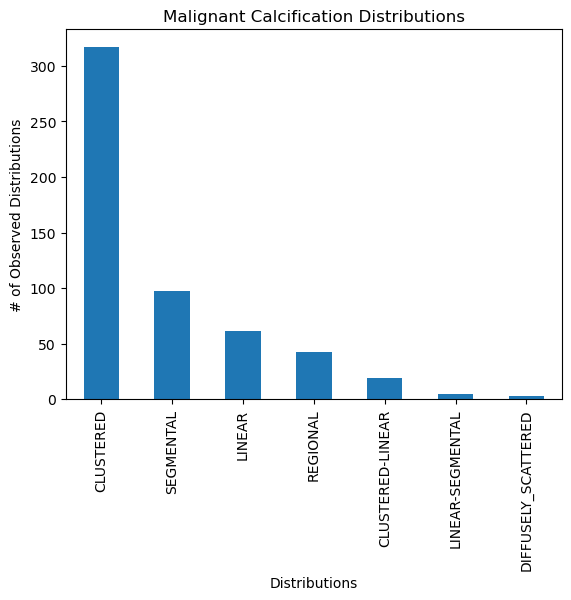

In [53]:
malignant_bar = malignant_distribution.plot(kind = "bar",
title = "Malignant Calcification Distributions",
xlabel = "Distributions",
ylabel = "# of Observed Distributions")
plt.show()

In [18]:
benign_type = benign_df['calc type'].value_counts()
benign_type

PLEOMORPHIC                             299
AMORPHOUS                                83
PUNCTATE                                 61
FINE_LINEAR_BRANCHING                    16
DYSTROPHIC                               12
PUNCTATE-PLEOMORPHIC                     11
PUNCTATE-AMORPHOUS                       10
ROUND_AND_REGULAR                         7
ROUND_AND_REGULAR-PLEOMORPHIC             7
AMORPHOUS-PLEOMORPHIC                     6
COARSE                                    3
PLEOMORPHIC-FINE_LINEAR_BRANCHING         3
COARSE-PLEOMORPHIC                        2
MILK_OF_CALCIUM                           2
ROUND_AND_REGULAR-PUNCTATE-AMORPHOUS      2
PLEOMORPHIC-PLEOMORPHIC                   1
ROUND_AND_REGULAR-AMORPHOUS               1
LUCENT_CENTERED                           1
Name: calc type, dtype: int64

In [19]:
benigncb_type = benignCB_df['calc type'].value_counts()
benigncb_type

LUCENT_CENTER                                               93
VASCULAR                                                    82
COARSE                                                      32
ROUND_AND_REGULAR-LUCENT_CENTER                             31
ROUND_AND_REGULAR-LUCENT_CENTER-PUNCTATE                    24
PUNCTATE                                                    24
ROUND_AND_REGULAR-EGGSHELL                                  23
LUCENT_CENTERED                                             17
ROUND_AND_REGULAR-LUCENT_CENTERED                           14
LARGE_RODLIKE-ROUND_AND_REGULAR                             11
COARSE-ROUND_AND_REGULAR-LUCENT_CENTER                      10
LUCENT_CENTER-PUNCTATE                                       8
DYSTROPHIC                                                   8
VASCULAR-COARSE-LUCENT_CENTERED                              8
PLEOMORPHIC                                                  8
EGGSHELL                                               

In [20]:
malignant_type = malignant_df['calc type'].value_counts()
malignant_type

PLEOMORPHIC                          357
FINE_LINEAR_BRANCHING                 56
AMORPHOUS                             55
PLEOMORPHIC-FINE_LINEAR_BRANCHING     25
PUNCTATE                              21
PUNCTATE-PLEOMORPHIC                  10
AMORPHOUS-PLEOMORPHIC                  6
PUNCTATE-FINE_LINEAR_BRANCHING         6
ROUND_AND_REGULAR                      3
AMORPHOUS-ROUND_AND_REGULAR            3
ROUND_AND_REGULAR-PUNCTATE             1
Name: calc type, dtype: int64

In [21]:
benign_subtlety = benign_df['subtlety'].value_counts()
benign_subtlety

3    165
2    136
4    109
5     74
1     44
Name: subtlety, dtype: int64

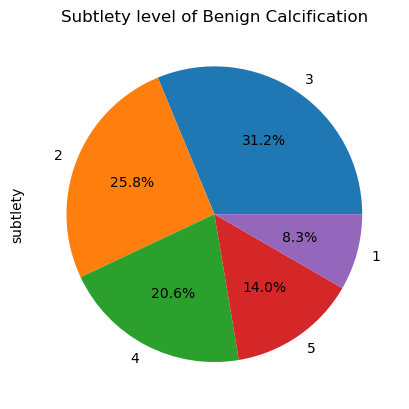

In [54]:
benign_pie = benign_subtlety.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Benign Calcification")
plt.show()

In [22]:
benigncb_subtlety = benignCB_df['subtlety'].value_counts()
benigncb_subtlety

5    179
3    174
4    121
Name: subtlety, dtype: int64

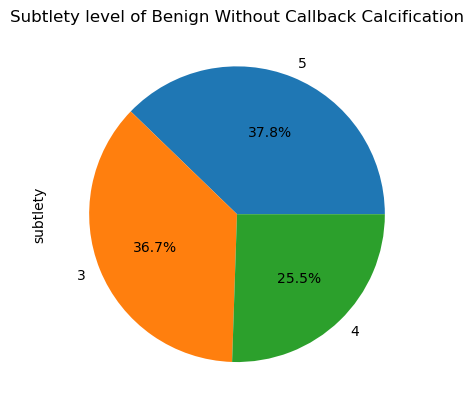

In [55]:
benigncb_pie = benigncb_subtlety.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Benign Without Callback Calcification")
plt.show()

In [23]:
malignant_subtlety = malignant_df['subtlety'].value_counts()
malignant_subtlety

3    163
4    116
5    108
2    106
1     51
Name: subtlety, dtype: int64

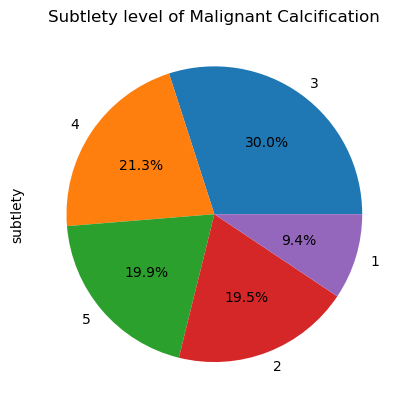

In [56]:
malignant_pie = malignant_subtlety.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Malignant Calcification")
plt.show()

In [24]:
csv_file_path2 = "./csv/mass_case_description_train_set.csv"
df2 = pd.read_csv(csv_file_path2)
df2 = df2.drop(['cropped image file path', 'ROI mask file path'], axis=1)
df2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...


In [25]:
df2.dtypes

patient_id              object
breast_density           int64
left or right breast    object
image view              object
abnormality id           int64
abnormality type        object
mass shape              object
mass margins            object
assessment               int64
pathology               object
subtlety                 int64
image file path         object
dtype: object

In [27]:
df2['image view'].groupby(df2['pathology']).value_counts()

pathology                image view
BENIGN                   MLO           304
                         CC            273
BENIGN_WITHOUT_CALLBACK  MLO            66
                         CC             38
MALIGNANT                MLO           341
                         CC            296
Name: image view, dtype: int64

In [63]:
benign2 = df2[(df2["pathology"] == "BENIGN")]
benign_df2 = pd.DataFrame(benign2)
benign_df2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path
2,P_00004,3,LEFT,CC,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_CC/1.3.6.1.4.1.9590...
3,P_00004,3,LEFT,MLO,1,mass,ARCHITECTURAL_DISTORTION,ILL_DEFINED,4,BENIGN,3,Mass-Training_P_00004_LEFT_MLO/1.3.6.1.4.1.959...
4,P_00004,3,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00004_RIGHT_MLO/1.3.6.1.4.1.95...
8,P_00018,2,RIGHT,CC,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_CC/1.3.6.1.4.1.959...
9,P_00018,2,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,4,BENIGN,5,Mass-Training_P_00018_RIGHT_MLO/1.3.6.1.4.1.95...


In [64]:
benignCB2 = df2[(df2["pathology"] == "BENIGN_WITHOUT_CALLBACK")]
benignCB_df2 = pd.DataFrame(benignCB2)
benignCB_df2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path
24,P_00041,1,LEFT,CC,1,mass,LYMPH_NODE,CIRCUMSCRIBED,2,BENIGN_WITHOUT_CALLBACK,5,Mass-Training_P_00041_LEFT_CC/1.3.6.1.4.1.9590...
25,P_00041,1,LEFT,MLO,1,mass,LOBULATED-LYMPH_NODE,CIRCUMSCRIBED,2,BENIGN_WITHOUT_CALLBACK,5,Mass-Training_P_00041_LEFT_MLO/1.3.6.1.4.1.959...
37,P_00054,4,RIGHT,MLO,1,mass,OVAL,CIRCUMSCRIBED,3,BENIGN_WITHOUT_CALLBACK,4,Mass-Training_P_00054_RIGHT_MLO/1.3.6.1.4.1.95...
46,P_00064,3,RIGHT,MLO,1,mass,FOCAL_ASYMMETRIC_DENSITY,ILL_DEFINED,3,BENIGN_WITHOUT_CALLBACK,4,Mass-Training_P_00064_RIGHT_MLO/1.3.6.1.4.1.95...
78,P_00106,1,LEFT,CC,1,mass,LYMPH_NODE,CIRCUMSCRIBED,2,BENIGN_WITHOUT_CALLBACK,4,Mass-Training_P_00106_LEFT_CC/1.3.6.1.4.1.9590...


In [65]:
malignant2 = df2[(df2["pathology"] == "MALIGNANT")]
malignant_df2 = pd.DataFrame(malignant2)
malignant_df2.head()

,patient_id,breast_density,left or right breast,image view,abnormality id,abnormality type,mass shape,mass margins,assessment,pathology,subtlety,image file path
0,P_00001,3,LEFT,CC,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_CC/1.3.6.1.4.1.9590...
1,P_00001,3,LEFT,MLO,1,mass,IRREGULAR-ARCHITECTURAL_DISTORTION,SPICULATED,4,MALIGNANT,4,Mass-Training_P_00001_LEFT_MLO/1.3.6.1.4.1.959...
5,P_00009,3,RIGHT,CC,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_CC/1.3.6.1.4.1.959...
6,P_00009,3,RIGHT,MLO,1,mass,OVAL,ILL_DEFINED,4,MALIGNANT,4,Mass-Training_P_00009_RIGHT_MLO/1.3.6.1.4.1.95...
7,P_00015,3,LEFT,MLO,1,mass,IRREGULAR,ILL_DEFINED-SPICULATED,4,MALIGNANT,4,Mass-Training_P_00015_LEFT_MLO/1.3.6.1.4.1.959...


In [66]:
benign_shape = benign_df2['mass shape'].value_counts()
benign_shape

OVAL                                  220
LOBULATED                             190
ROUND                                  75
IRREGULAR                              55
ARCHITECTURAL_DISTORTION               17
FOCAL_ASYMMETRIC_DENSITY                7
ROUND-OVAL                              3
LOBULATED-IRREGULAR                     2
IRREGULAR-FOCAL_ASYMMETRIC_DENSITY      2
IRREGULAR-ARCHITECTURAL_DISTORTION      2
LOBULATED-OVAL                          1
ROUND-LOBULATED                         1
Name: mass shape, dtype: int64

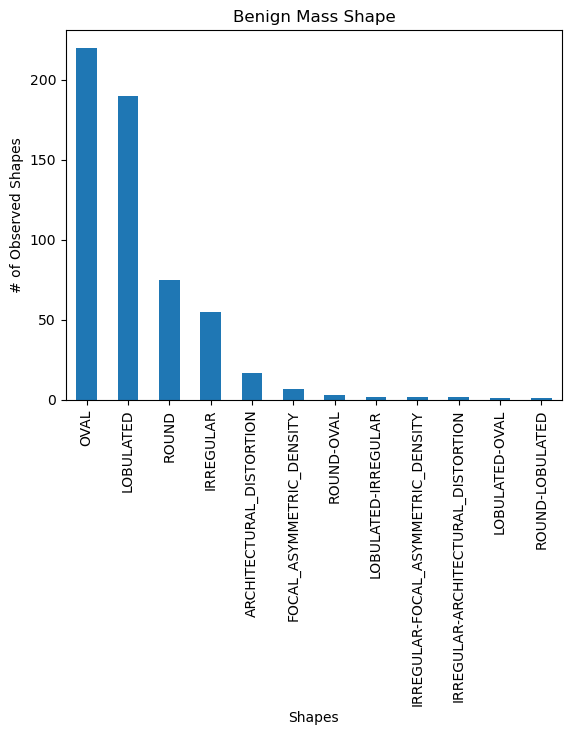

In [67]:
benign_bar2 = benign_shape.plot(kind = "bar",
title = "Benign Mass Shape",
xlabel = "Shapes",
ylabel = "# of Observed Shapes")
plt.show()

In [34]:
benignCB_shape = benignCB_df2['mass shape'].value_counts()
benignCB_shape

LYMPH_NODE                  26
ASYMMETRIC_BREAST_TISSUE    12
LOBULATED                   11
ARCHITECTURAL_DISTORTION    11
OVAL                        10
ROUND                        9
IRREGULAR                    9
FOCAL_ASYMMETRIC_DENSITY     7
OVAL-LYMPH_NODE              6
LOBULATED-LYMPH_NODE         3
Name: mass shape, dtype: int64

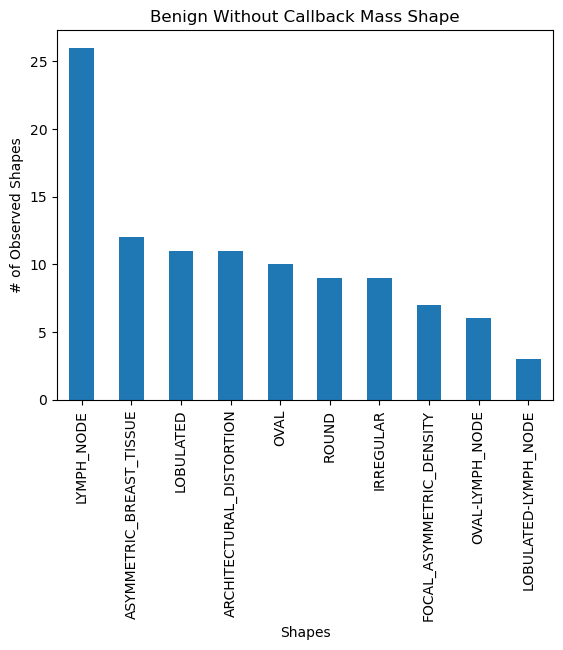

In [57]:
benignCB_bar2 = benignCB_shape.plot(kind = "bar",
title = "Benign Without Callback Mass Shape",
xlabel = "Shapes",
ylabel = "# of Observed Shapes")
plt.show()

In [35]:
malignant_shape = malignant_df2['mass shape'].value_counts()
malignant_shape

IRREGULAR                                   287
LOBULATED                                   104
OVAL                                         91
ARCHITECTURAL_DISTORTION                     52
IRREGULAR-ARCHITECTURAL_DISTORTION           43
ROUND                                        39
ASYMMETRIC_BREAST_TISSUE                      8
FOCAL_ASYMMETRIC_DENSITY                      5
LOBULATED-IRREGULAR                           3
LOBULATED-ARCHITECTURAL_DISTORTION            2
ROUND-IRREGULAR-ARCHITECTURAL_DISTORTION      1
Name: mass shape, dtype: int64

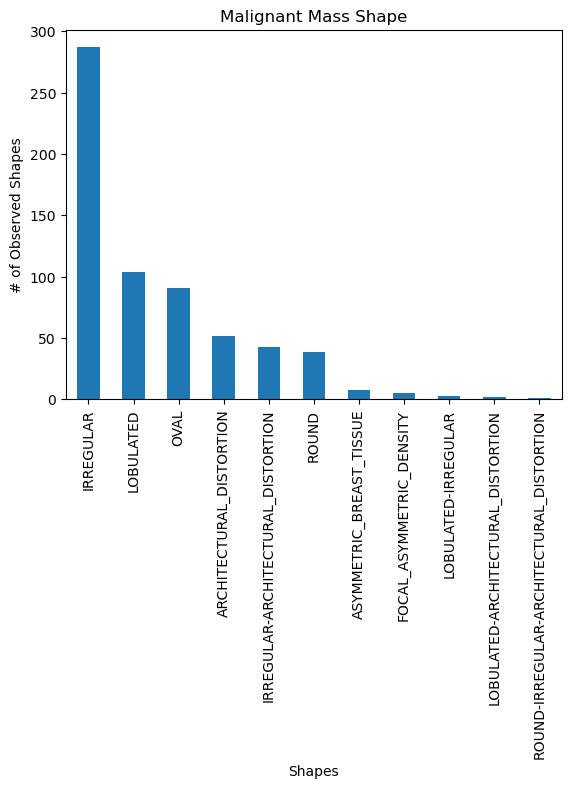

In [58]:
malignant_bar2 = malignant_shape.plot(kind = "bar",
title = "Malignant Mass Shape",
xlabel = "Shapes",
ylabel = "# of Observed Shapes")
plt.show()

In [36]:
benign_margins = benign_df2['mass margins'].value_counts()
benign_margins

CIRCUMSCRIBED                   226
OBSCURED                        168
ILL_DEFINED                      93
MICROLOBULATED                   33
CIRCUMSCRIBED-OBSCURED           18
CIRCUMSCRIBED-ILL_DEFINED        14
SPICULATED                       11
OBSCURED-ILL_DEFINED              2
MICROLOBULATED-ILL_DEFINED        2
ILL_DEFINED-SPICULATED            2
CIRCUMSCRIBED-MICROLOBULATED      1
Name: mass margins, dtype: int64

In [37]:
benignCB_margins = benignCB_df2['mass margins'].value_counts()
benignCB_margins

CIRCUMSCRIBED     47
ILL_DEFINED       10
SPICULATED        10
MICROLOBULATED     6
OBSCURED           4
Name: mass margins, dtype: int64

In [38]:
malignant_margins = malignant_df2['mass margins'].value_counts()
malignant_margins

SPICULATED                               260
ILL_DEFINED                              175
MICROLOBULATED                            69
CIRCUMSCRIBED                             32
OBSCURED                                  25
ILL_DEFINED-SPICULATED                    23
OBSCURED-ILL_DEFINED                      17
CIRCUMSCRIBED-ILL_DEFINED                 13
OBSCURED-SPICULATED                        4
OBSCURED-ILL_DEFINED-SPICULATED            4
MICROLOBULATED-ILL_DEFINED-SPICULATED      2
MICROLOBULATED-SPICULATED                  2
MICROLOBULATED-ILL_DEFINED                 1
CIRCUMSCRIBED-OBSCURED                     1
Name: mass margins, dtype: int64

In [39]:
benign_subtlety2 = benign_df2['subtlety'].value_counts()
benign_subtlety2

5    206
4    180
3    139
2     40
1     10
0      2
Name: subtlety, dtype: int64

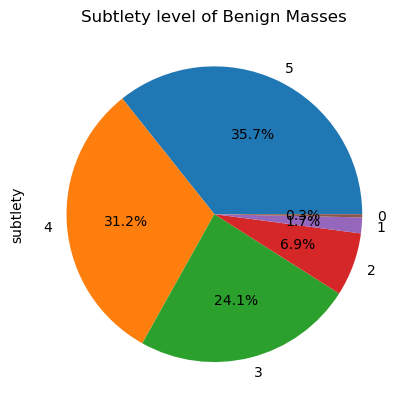

In [59]:
benign_pie2 = benign_subtlety2.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Benign Masses")
plt.show()

In [40]:
benigncb_subtlety2 = benignCB_df2['subtlety'].value_counts()
benigncb_subtlety2

5    43
4    39
3    17
2     4
1     1
Name: subtlety, dtype: int64

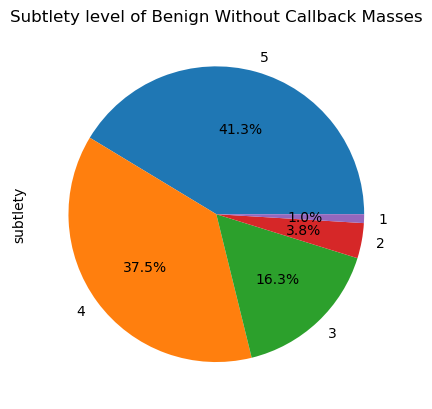

In [60]:
benigncb_pie2 = benigncb_subtlety2.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Benign Without Callback Masses")
plt.show()

In [41]:
malignant_subtlety2 = malignant_df2['subtlety'].value_counts()
malignant_subtlety2

5    294
4    156
3    101
2     56
1     30
Name: subtlety, dtype: int64

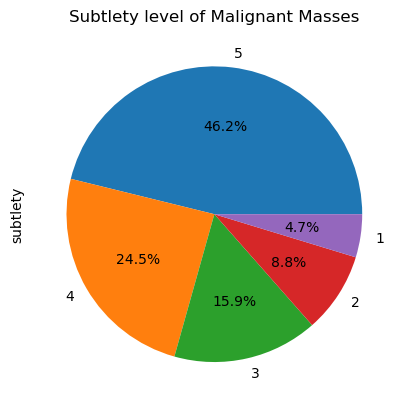

In [61]:
malignant_pie2 = malignant_subtlety2.plot(kind ="pie", autopct="%1.1f%%", title = "Subtlety level of Malignant Masses")
plt.show()